This notebook will focus on baseline ML models

Import all necessary libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor

In [60]:
df = pd.read_csv("../Data/preprocessed/fakenews_preprocessed.csv")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62126 entries, 0 to 62125
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  62126 non-null  object 
 1   text                   62126 non-null  object 
 2   subject                62126 non-null  object 
 3   real                   62126 non-null  int64  
 4   clean_title            62126 non-null  object 
 5   clean_text             62126 non-null  object 
 6   text_len               62126 non-null  int64  
 7   avg_word_len           61679 non-null  float64
 8   num_sents              62126 non-null  int64  
 9   polarity               62126 non-null  float64
 10  subjectivity           62126 non-null  float64
 11  prep_text              61678 non-null  object 
 12  sentence_count         62126 non-null  int64  
 13  grade_level            60671 non-null  float64
 14  flesch_ease            60671 non-null  float64
 15  fl

In [62]:
df.head()

,title,text,subject,real,clean_title,clean_text,text_len,avg_word_len,num_sents,polarity,...,flesch_grade,gunning_fog,smog,ari,coleman_liau,flesch_interpretation,punct_count,word_count,punct_ratio,entity_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,donald trump sends out embarrassing new ear s...,donald trump just couldn t wish all americans ...,503,4.337972,1,-0.014387,...,8.726552,10.363443,11.812371,9.679789,9.062195,Standard - 8th-9th grade,121,495,0.244444,28
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,309,4.951456,1,0.033536,...,10.942923,13.072860,12.745085,11.595993,11.947541,Difficult - College,39,305,0.127869,24
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,sheriff david clarke becomes an internet joke...,on frida it was revealed that former milwaukee...,598,4.658863,1,-0.020018,...,8.616870,10.647496,11.645159,10.957494,10.928843,Standard - 8th-9th grade,148,580,0.255172,37
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,trump is so obsessed he even has obama s name...,on christmas da donald trump announced that he...,458,4.665939,1,-0.026923,...,9.966244,12.498177,13.023867,11.788649,11.285261,Fairly Difficult - 10th-12th grade,118,444,0.265766,26
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,pope francis just called out donald trump dur...,pope francis used his annual christmas da mess...,425,4.322353,1,-0.069810,...,9.766190,12.209524,11.505630,10.522929,8.655714,Standard - 8th-9th grade,40,420,0.095238,24


In [63]:
df["prep_text"].isna().sum()

np.int64(448)

In [64]:
df = df.dropna(subset=["prep_text"])

In [65]:
X = df["prep_text"].values
y = df["real"].values

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Multi scoring for classification algorithms

In [67]:
def evaluate_model(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
    }

In [113]:
results = []
results_deep = []

TF-IDF Model

In [69]:
tfidf = TfidfVectorizer(binary=True)
X_train = tfidf.fit_transform(X_train)
X_val = tfidf.transform(X_val)

# Classification Models

Linear Regression

In [70]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [71]:
y_pred = model_lr.predict(X_val)

In [72]:
metrics_lr = evaluate_model("Logistic Regression", y_val, y_pred)
results.append(metrics_lr)

In [73]:
metrics_lr

{'Model': 'Logistic Regression',
 'Accuracy': 0.9893806744487679,
 'Precision': 0.9864373601789709,
 'Recall': 0.9952038369304557,
 'F1': 0.9908012077803525}

Ridge Regression

In [74]:
model_rr = RidgeClassifier()
model_rr.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,None


In [75]:
y_pred = model_rr.predict(X_val)

In [76]:
metrics_rr = evaluate_model("Ridge Classifier", y_val, y_pred)
results.append(metrics_rr)

In [77]:
metrics_rr

{'Model': 'Ridge Regression',
 'Accuracy': 0.9948929961089494,
 'Precision': 0.9920168067226891,
 'Recall': 0.9991536182818451,
 'F1': 0.9955724225173941}

SVR Model

In [78]:
#model_svr = SVR()
#odel_svr.fit(X_train, y_train)

Dropping SVR since it's taking over 2h to run it.

In [79]:
#y_pred = model_svr.predict(X_val)

In [80]:
#metrics_svr = evaluate_model("SVR", y_val, y_pred)
#results.append(metrics_svr)

In [81]:
#metrics_svr

Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestClassifier

model_rf = model_rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [83]:
y_pred = model_rf.predict(X_val)

In [84]:
metrics_rf = evaluate_model("Random Forest Classifier", y_val, y_pred)
results.append(metrics_rf)

In [85]:
metrics_rf

{'Model': 'Random Forest Classifier',
 'Accuracy': 0.9790856031128404,
 'Precision': 0.9678126284070675,
 'Recall': 0.996755536747073,
 'F1': 0.9820708825573314}

Gradient Boosting

In [86]:
model_gbr = GradientBoostingClassifier(random_state=42)
model_gbr.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [87]:
y_pred = model_gbr.predict(X_val)

In [88]:
metrics_gbr = evaluate_model("Gradient Boosting Classifier", y_val, y_pred)
results.append(metrics_gbr)

In [89]:
metrics_gbr

{'Model': 'Gradient Boosting Classifier',
 'Accuracy': 0.9657911802853437,
 'Precision': 0.9666806663866723,
 'Recall': 0.9740442939765834,
 'F1': 0.9703485103991006}

XGBoost

In [90]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42, eval_metric="logloss", n_estimators=300, n_jobs=-1)
model_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [91]:
y_pred = model_xgb.predict(X_val)

In [92]:
metrics_xgb = evaluate_model("XGBoost Classifier", y_val, y_pred)
results.append(metrics_xgb)

In [93]:
metrics_xgb

{'Model': 'XGBoost Classifier',
 'Accuracy': 0.9912451361867705,
 'Precision': 0.9901699199550625,
 'Recall': 0.9946395824516857,
 'F1': 0.9923997185080929}

In [94]:
df_results = pd.DataFrame(results)
df_results

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.989381,0.986437,0.995204,0.990801
1,Ridge Regression,0.994893,0.992017,0.999154,0.995572
2,Random Forest Classifier,0.979086,0.967813,0.996756,0.982071
3,Gradient Boosting Classifier,0.965791,0.966681,0.974044,0.970349
4,XGBoost Classifier,0.991245,0.990170,0.994640,0.992400


In [95]:
df_melt = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

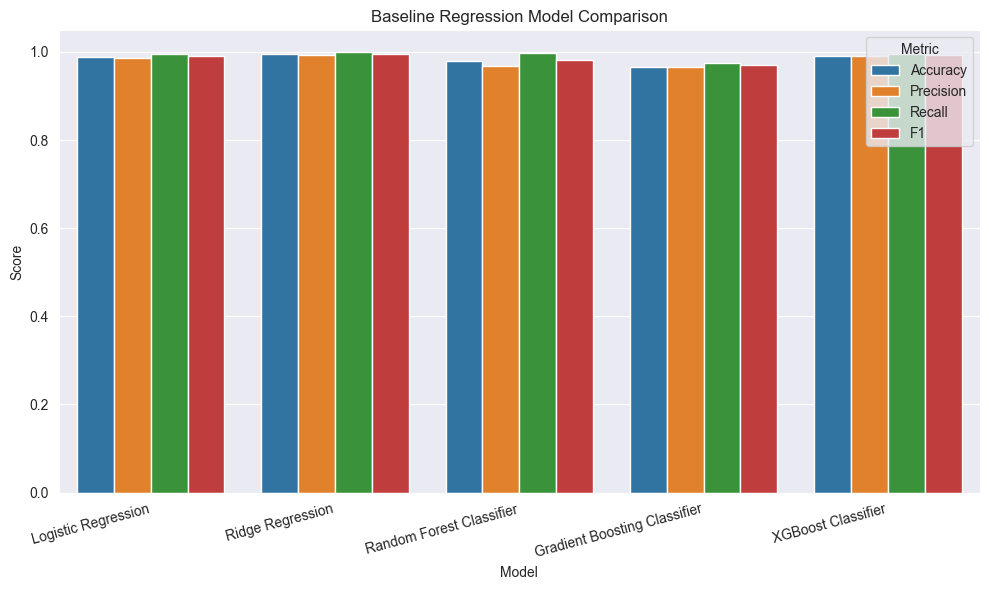

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melt, x="Model", y="Score", hue="Metric")
plt.title("Baseline Classifier Model Comparison")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("../images/classifierModels.csv")
plt.show()

All the models worked really good, which I think it's very suspicious as in the literature, these models shouldn't have performed this well... Let's do some checking

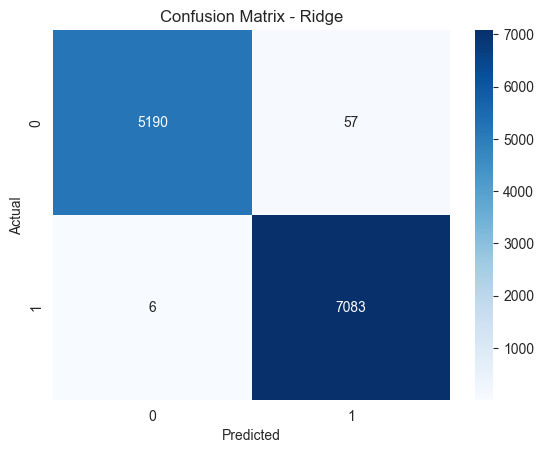


Ridge:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5247
           1       0.99      1.00      1.00      7089

    accuracy                           0.99     12336
   macro avg       1.00      0.99      0.99     12336
weighted avg       0.99      0.99      0.99     12336



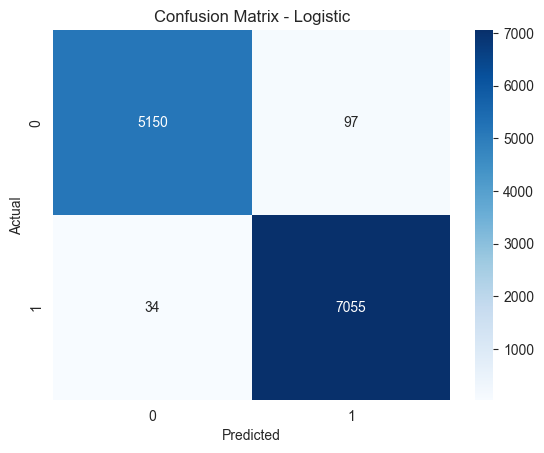


Logistic:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5247
           1       0.99      1.00      0.99      7089

    accuracy                           0.99     12336
   macro avg       0.99      0.99      0.99     12336
weighted avg       0.99      0.99      0.99     12336



In [97]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in [("Ridge", model_rr), ("Logistic", model_lr)]:
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"\n{name}:\n", classification_report(y_val, y_pred))

This is looking legit so far

In [98]:
df["real"].value_counts(normalize=True)

real
1    0.577483
0    0.422517
Name: proportion, dtype: float64

In [99]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rr, X_train, y_train, cv=5, scoring="f1")
print(cv_scores, cv_scores.mean())

[0.99545455 0.99433354 0.99475708 0.99536592 0.99432364] 0.9948469435273359


In [100]:
from sklearn.model_selection import cross_validate
scoring = {"f1_fake": "f1_macro", "f1_weighted": "f1_weighted"}
scores = cross_validate(model_rr, X_train, y_train, cv=5, scoring=scoring)
print(scores)

{'fit_time': array([2.84381247, 1.73113346, 1.96383166, 1.57997298, 1.64691353]), 'score_time': array([0.01275158, 0.01028395, 0.01472497, 0.01591849, 0.01639223]), 'test_f1_fake': array([0.99459399, 0.99323548, 0.99376059, 0.9944898 , 0.99323907]), 'test_f1_weighted': array([0.99472853, 0.99340716, 0.99391651, 0.99462688, 0.99340855])}


The model is able to fit very quickly and even using cross validation, the model still performs incredibly well with very little variance between each fold. T

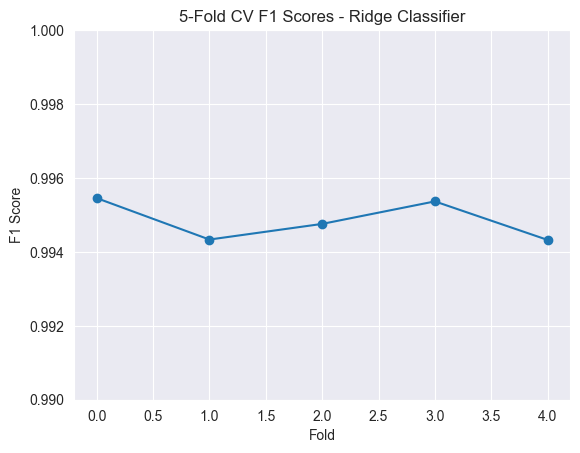

In [101]:
import matplotlib.pyplot as plt
plt.plot(cv_scores, marker='o')
plt.title("5-Fold CV F1 Scores - Ridge Classifier")
plt.ylabel("F1 Score")
plt.xlabel("Fold")
plt.ylim(0.99, 1.0)
plt.grid(True)
plt.show()

# Deep Learning

In [194]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import TextVectorization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from keras.src.layers import Bidirectional

from tensorflow.keras.layers import LSTM

In [142]:
X = df["prep_text"].astype(str).values
y = df["real"].values

In [143]:
X_train_text, X_val_text, y_train_text, y_val_text = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
max_vocab_size = 50000
max_len = 200
embedding_dim = 64

In [145]:
text_vec = TextVectorization(
    max_tokens=max_vocab_size,
    output_mode="int",
    output_sequence_length=max_len,  #
    standardize="lower_and_strip_punctuation",
    split="whitespace",
)

In [146]:
text_vec.adapt(X_train_text)

In [147]:
inputs = tf.keras.Input(shape=(1,), dtype=tf.string)

In [148]:
x = text_vec(inputs)
x = layers.Embedding(input_dim=max_vocab_size, output_dim=embedding_dim)(x)
x = layers.SimpleRNN(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

Simple RNN

In [161]:
model_rnn = models.Model(inputs, outputs)
model_rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [172]:
history_rnn = model_rnn.fit(X_train_text, y_train_text, validation_data=(X_val_text, y_val_text), epochs=3, batch_size=128)

Epoch 1/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.8957 - loss: 0.2281 - val_accuracy: 0.8063 - val_loss: 0.5468
Epoch 2/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.8918 - loss: 0.2297 - val_accuracy: 0.7940 - val_loss: 0.5544
Epoch 3/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.8386 - loss: 0.3380 - val_accuracy: 0.7160 - val_loss: 0.7428


In [173]:
y_pred_prob_rnn = model_rnn.predict(X_val_text)
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int).flatten()

386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [174]:
model_rnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 200, 64)        │     3,200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,624,965 (36.72 MB)

 Trainable params: 3,208,321 (12.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,416,644 (24.48 MB)

In [175]:
print(history_rnn.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


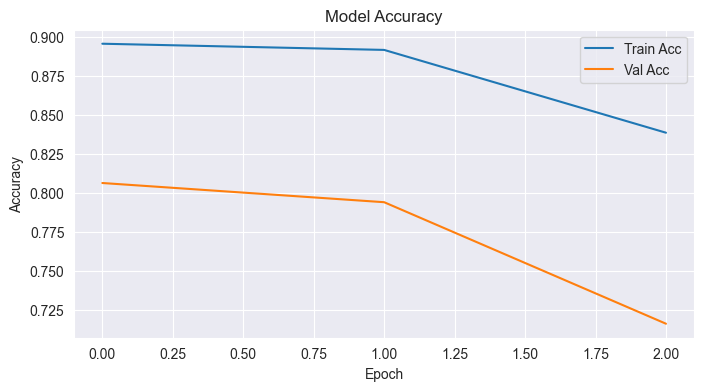

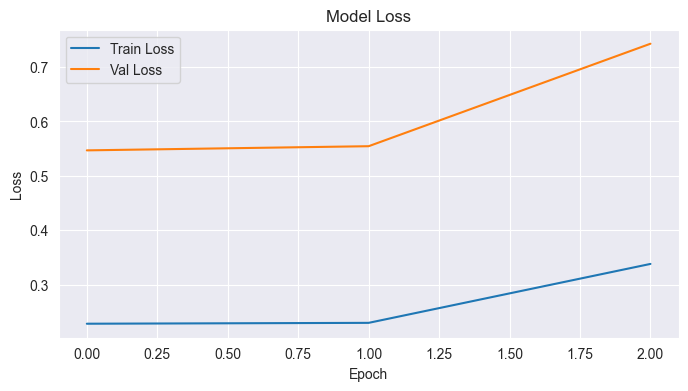

In [176]:
plt.figure(figsize=(8,4))
plt.plot(history_rnn.history['accuracy'], label='Train Acc')
plt.plot(history_rnn.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [177]:
loss, acc = model_rnn.evaluate(X_val_text, y_val, verbose=0)
print(f"Validation accuracy: {acc:.4f}")
print(f"Validation loss: {loss:.4f}")

Validation accuracy: 0.7160
Validation loss: 0.7428


In [178]:
print(classification_report(y_val, y_pred_rnn))
print(confusion_matrix(y_val, y_pred_rnn))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64      5247
           1       0.73      0.80      0.77      7089

    accuracy                           0.72     12336
   macro avg       0.71      0.70      0.70     12336
weighted avg       0.71      0.72      0.71     12336

[[3128 2119]
 [1384 5705]]


In [179]:
metrics_rnn = evaluate_model("Simple RNN", y_val, y_pred_rnn)
results_deep.append(metrics_rnn)

LSTM

LSTM accepts numeric values, so we ned to change data

In [183]:
X_train_pad = text_vec(X_train_text)
X_val_pad   = text_vec(X_val_text)

In [184]:
X_train_pad = X_train_pad.numpy()
X_val_pad   = X_val_pad.numpy()

In [185]:
model_lstm = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

C:\Users\Owner\PycharmProjects\TrustNet\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [186]:
model_lstm.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

In [187]:
history_lstm = model_lstm.fit(
    X_train_pad, y_train_text,
    validation_data=(X_val_pad, y_val_text),
    epochs=3,
    batch_size=128,
    verbose=1
)

Epoch 1/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.8612 - loss: 0.3352 - val_accuracy: 0.9540 - val_loss: 0.1848
Epoch 2/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9476 - loss: 0.1908 - val_accuracy: 0.9600 - val_loss: 0.1424
Epoch 3/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.8628 - loss: 0.3465 - val_accuracy: 0.9365 - val_loss: 0.2066


In [188]:
y_proba_lstm = model_lstm.predict(X_val_pad)
y_pred_lstm = (y_proba_lstm >= 0.5).astype(int).flatten()

386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [189]:
print(classification_report(y_val, y_pred_lstm))
print(confusion_matrix(y_val, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5247
           1       0.97      0.92      0.94      7089

    accuracy                           0.94     12336
   macro avg       0.93      0.94      0.94     12336
weighted avg       0.94      0.94      0.94     12336

[[5012  235]
 [ 548 6541]]


In [190]:
metrics_lstm = evaluate_model("LSTM", y_val, y_pred_lstm)
results_deep.append(metrics_lstm)

In [191]:
print(metrics_lstm)

{'Model': 'LSTM', 'Accuracy': 0.9365272373540856, 'Precision': 0.9653187721369539, 'Recall': 0.9226971364085202, 'F1': 0.943526866209881}


Bidirectional LSTM

In [195]:
model_bilstm = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(1, activation="sigmoid")
])

C:\Users\Owner\PycharmProjects\TrustNet\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [196]:
model_bilstm.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

In [197]:
history_bilstm = model_bilstm.fit(
    X_train_pad, y_train_text,
    validation_data=(X_val_pad, y_val_text),
    epochs=3,
    batch_size=128,
    verbose=1
)

Epoch 1/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 171s 437ms/step - accuracy: 0.9596 - loss: 0.0953 - val_accuracy: 0.9917 - val_loss: 0.0283
Epoch 2/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 142s 368ms/step - accuracy: 0.9961 - loss: 0.0136 - val_accuracy: 0.9924 - val_loss: 0.0230
Epoch 3/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 144s 374ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9928 - val_loss: 0.0249


In [198]:
y_proba_bilstm = model_bilstm.predict(X_val_pad)

386/386 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step


In [199]:
y_pred_bilstm = (y_proba_bilstm >= 0.5).astype(int).flatten()


In [200]:
print(classification_report(y_val, y_pred_bilstm))
print(confusion_matrix(y_val, y_pred_bilstm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5247
           1       0.99      0.99      0.99      7089

    accuracy                           0.99     12336
   macro avg       0.99      0.99      0.99     12336
weighted avg       0.99      0.99      0.99     12336

[[5196   51]
 [  38 7051]]


In [201]:
metrics_bilstm = evaluate_model("Bidirectional LSTM", y_val, y_pred_bilstm)
results_deep.append(metrics_bilstm)

In [202]:
print(metrics_bilstm)

{'Model': 'Bidirectional LSTM', 'Accuracy': 0.9927853437094682, 'Precision': 0.992818924246691, 'Recall': 0.9946395824516857, 'F1': 0.9937284194207596}


Bidirectional RNN

In [203]:
model_birnn = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(SimpleRNN(64)),
    Dense(1, activation="sigmoid")
])

C:\Users\Owner\PycharmProjects\TrustNet\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [204]:
model_birnn.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

In [205]:
history_birnn = model_birnn.fit(
    X_train_pad, y_train_text,
    validation_data=(X_val_pad, y_val_text),
    epochs=3,
    batch_size=128,
    verbose=1
)

Epoch 1/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.9522 - loss: 0.1252 - val_accuracy: 0.9832 - val_loss: 0.0507
Epoch 2/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9887 - val_loss: 0.0376
Epoch 3/3
386/386 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.9964 - loss: 0.0134 - val_accuracy: 0.9878 - val_loss: 0.0381


In [206]:
y_proba_birnn = model_birnn.predict(X_val_pad)
y_pred_birnn = (y_proba_birnn >= 0.5).astype(int).flatten()

386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


In [207]:
print(classification_report(y_val_text, y_pred_birnn))
print(confusion_matrix(y_val_text, y_pred_birnn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5247
           1       0.99      0.99      0.99      7089

    accuracy                           0.99     12336
   macro avg       0.99      0.99      0.99     12336
weighted avg       0.99      0.99      0.99     12336

[[5184   63]
 [  87 7002]]


In [208]:
metrics_birnn = evaluate_model("Bidirectional RNN", y_val_text, y_pred_birnn)
results_deep.append(metrics_birnn)

In [209]:
print(metrics_birnn)

{'Model': 'Bidirectional RNN', 'Accuracy': 0.9878404669260701, 'Precision': 0.9910828025477707, 'Recall': 0.9877274650867541, 'F1': 0.9894022891055532}


Results

In [210]:
df_results_deep = pd.DataFrame(results_deep)
df_results_deep

,Model,Accuracy,Precision,Recall,F1
0,Simple RNN,0.826362,0.813617,0.905205,0.856971
1,Simple RNN,0.826362,0.813617,0.905205,0.856971
2,Simple RNN,0.716034,0.729167,0.804768,0.765104
3,LSTM,0.936527,0.965319,0.922697,0.943527
4,Bidirectional LSTM,0.992785,0.992819,0.994640,0.993728
5,Bidirectional RNN,0.987840,0.991083,0.987727,0.989402


In [211]:
df_melt_deep = df_results_deep.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Score"
)

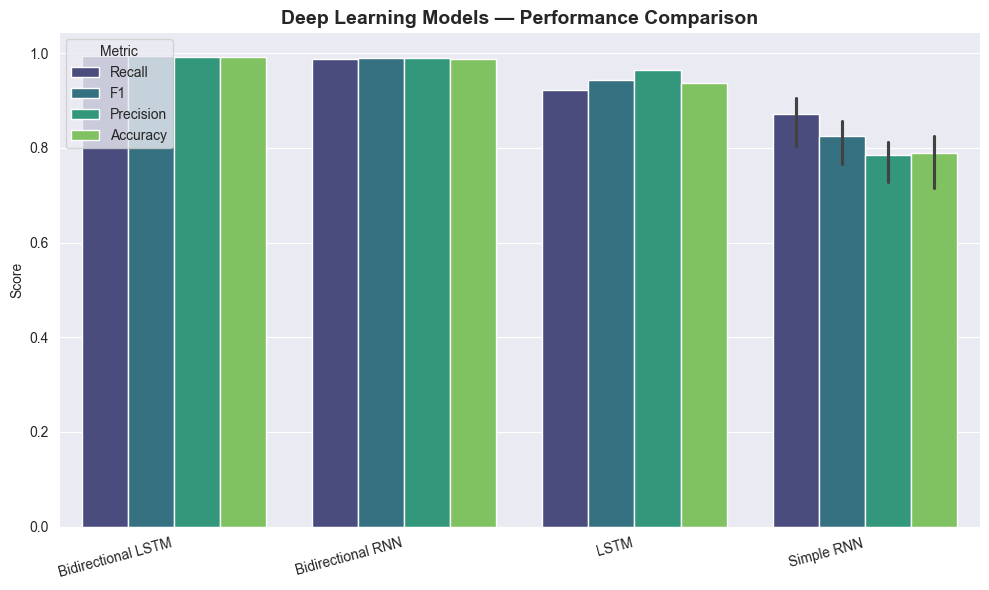

In [212]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melt_deep.sort_values(by="Score", ascending=False),
    x="Model", y="Score", hue="Metric", palette="viridis"
)
plt.title("Deep Learning Models — Performance Comparison", fontsize=14, weight='bold')
plt.xticks(rotation=15, ha="right")
plt.ylabel("Score")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Transformers

Bert

DistilBERT